In [1]:
import sys; sys.path.append('../code')

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams["ps.usedistiller"] = 'xpdf'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import figurefirst as fifi
import utility
from scipy.interpolate import interp1d
import pynumdiff

In [3]:
import fly_plot_lib.plot as fpl

In [4]:
fififig = '../figures_svg/fig_2_anemotaxis.svg'
FONTSIZE = 7

In [5]:
def plot_phase_portrait(v=1, zeta=0, ax=None, color='black'):
    if ax is None:
        fig = plt.figure(figsize=(10,3))
        ax = fig.add_subplot(111)
        
        
    psi_g = np.linspace(-2*np.pi, 2*np.pi, 300)
    psi_g_dot = np.arctan2( np.sin(psi_g-zeta), (v-np.cos(psi_g-zeta)))

    ## now get points equally along the line
    N = 300
    x = psi_g
    y = psi_g_dot
    # Linear length on the line
    distance = np.cumsum(np.sqrt( np.ediff1d(x, to_begin=0)**2 + np.ediff1d(y, to_begin=0)**2 ))
    distance = distance/distance[-1]
    fx, fy = interp1d( distance, x ), interp1d( distance, y )
    alpha = np.linspace(0, 1, N)
    x_regular, y_regular = fx(alpha), fy(alpha)
    psi_g = x_regular
    psi_g_dot = y_regular
    ##
    
    d_psi_g_dot = pynumdiff.finite_difference.first_order(psi_g_dot, 1)[1]
    d_psi_g = pynumdiff.finite_difference.first_order(psi_g, 1)[1]
    slopes = np.arctan2(d_psi_g_dot, d_psi_g)
    
    print(np.min(np.abs(slopes)))
    ix = np.where(psi_g_dot[1:]<=0)[0]
    slopes[ix] = utility.wrap_angle(slopes[ix] + np.pi)

    fpl.colorline_with_heading(ax, psi_g, psi_g_dot, color, slopes, 
                                       size_angle=20,
                                        nskip=10, size_radius=.5, deg=False, 
                                           center_point_size=0.0001, show_centers=False,
                              center_offset_fraction=1)

    ax.set_xlim(-2*np.pi, 2*np.pi)
    

    ax.set_aspect('equal')

    ax.plot(psi_g, psi_g_dot, linewidth=0.2, color=color)

# Make the plot

0.410338519620297
0.1008566968406727
0.005324344187903592


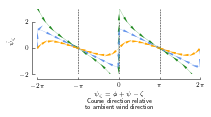

In [6]:
zeta = 0
xticks = [-2*np.pi+0, -np.pi+0, 0, np.pi+0, 2*np.pi+0]
spines = ['left', 'bottom']

layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                       autogenlayers=True, make_mplfigures=True, hide_layers=[])
ax = layout.axes[('zeta_a', 'zeta_a')]

plot_phase_portrait(v=0.5, zeta=zeta, ax=ax, color='forestgreen')
plot_phase_portrait(v=1.01, zeta=zeta, ax=ax, color='cornflowerblue')
plot_phase_portrait(v=2, zeta=zeta, ax=ax, color='orange')
#plot_phase_portrait(v=4, zeta=zeta, ax=ax, color='red')

ax.vlines([zeta], -2, 2, colors='black', linestyles='--', zorder=-100, linewidth=0.5)
ax.vlines([zeta-np.pi, zeta + np.pi], -2, 3, colors='black', linestyles='--', zorder=-100, linewidth=0.5)

ax.set_ylim(-2, 3)
ax.set_xlim(xticks[0], xticks[-1])

fifi.mpl_functions.adjust_spines(ax, spines, 
                                 yticks=[-2, 0, 2],
                                 xticks=xticks,
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=0.5)

ax.set_xticklabels([r'$-2\pi$', r'$-\pi$', r'$0$', r'$\pi$', r'$2\pi$'],
                   rotation = 0)

ax.set_ylabel(r'$\dot{\psi_{\zeta}}$')
ax.set_xlabel(r'$\psi_{\zeta}=\phi+\psi-\zeta$' + '\n Course direction relative \n to ambient wind direction')

fifi.mpl_functions.set_fontsize(ax, 6)

layout.append_figure_to_layer(layout.figures['zeta_a'], 'zeta_a', cleartarget=True)
layout.write_svg(fififig)

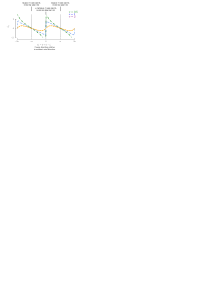

In [7]:
from IPython.display import display,SVG
display(SVG(fififig))